In [60]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [61]:
# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\marco\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [62]:
books_df = pd.read_csv(f"{path}/books.csv")
print("Number of books in dataset:", len(books_df))

Number of books in dataset: 6810


In [63]:
books_df.head(5)  # Display the first 5 rows of the dataset

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


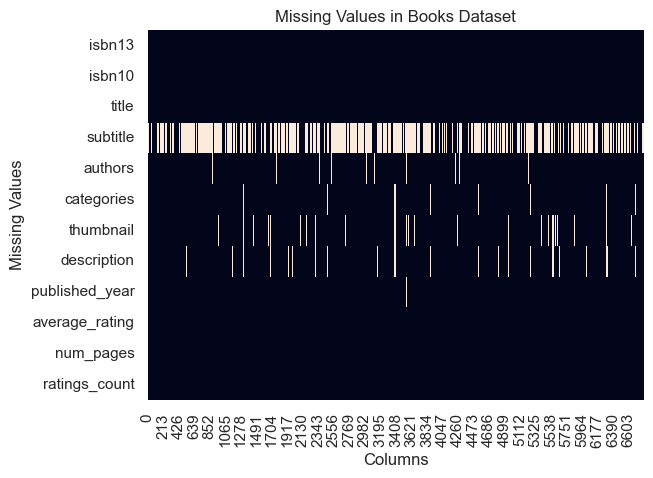

In [64]:
ax = plt.axes()
sns.heatmap(books_df.isna().T, cbar=False, ax=ax)

plt.title("Missing Values in Books Dataset")
plt.xlabel("Columns")
plt.ylabel("Missing Values")

plt.show()

From the plot diagram, we can see the subtitle values are missing in many rows. As well, if there is a missing value in average rating, there is also missing the value of num pages and ratirng count. This is a common pattern in datasets where certain attributes are dependent on others.

We will do a bit of feature engineering to identify some of the missing values

In [65]:
current_year = datetime.datetime.now().year
print("Current year:", current_year)

Current year: 2025


In [66]:
books_df["missing_description"] = np.where(books_df["description"].isna(), 1, 0)
books_df["age_of_book"] = current_year - books_df["published_year"]

books_df["age_of_book"].head(5)

0    21.0
1    25.0
2    43.0
3    32.0
4    23.0
Name: age_of_book, dtype: float64

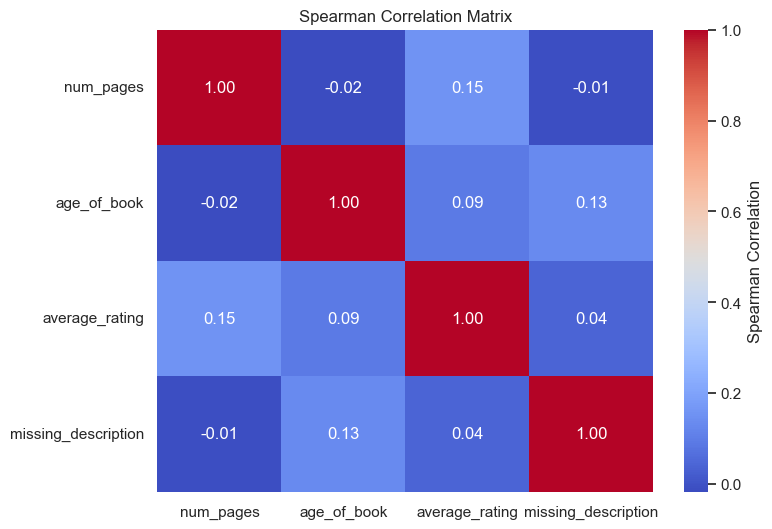

In [67]:
columns_of_interest = ["num_pages", "age_of_book", "average_rating", "missing_description"]

correlation_matrix = books_df[columns_of_interest].corr(method="spearman")

sns.set_theme(style="white")
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar_kws={"label": "Spearman Correlation"})
heatmap.set_title("Spearman Correlation Matrix")
plt.show()

In [68]:
books_df[(books_df["description"].isna()) |
                        (books_df["num_pages"].isna()) |
                        (books_df["average_rating"].isna()) |
                        (books_df["published_year"].isna())]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,25.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,23.0
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,47.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,72.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0,1,23.0
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0,1,19.0
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007.0,NaN,NaN,NaN,0,18.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,32.0


Changing the logic so the dataframe only contains rows without missing values in the columns of interest

In [69]:
books_df = books_df[~(books_df["description"].isna()) &
         ~(books_df["num_pages"].isna()) &
         ~(books_df["average_rating"].isna()) &
         ~(books_df["published_year"].isna())]

books_df

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0
6808,9789027712059,9027712050,The Berlin Phenomenology,NaN,Georg Wilhelm Friedrich Hegel,History,http://books.google.com/books/content?id=Vy7Sk...,Since the three volume edition ofHegel's Philo...,1981.0,0.00,210.0,0.0,0,44.0


In [70]:
books_df["categories"].value_counts().reset_index().sort_values("count", ascending=False)

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
519,Aeronautics,1
518,Childbirth,1
517,Consumer behavior,1
516,Seduction,1


In [71]:
books_df["words_in_description"] = books_df["description"].str.split().str.len()

books_df[["description", "words_in_description"]].head(5)

,description,words_in_description
0,A NOVEL THAT READERS and critics have been eag...,199
1,A new 'Christie for Christmas' -- a full-lengt...,205
2,Volume Two of Stephen Donaldson's acclaimed se...,14
3,"A memorable, mesmerizing heroine Jennifer -- b...",57
4,Lewis' work on the nature of love divides love...,45


In [72]:
books_df.loc[books_df["words_in_description"].between(1, 4), ["description", "words_in_description"]].head(10)

,description,words_in_description
6,Donation.,1
11,Fantasy-roman.,1
748,Includes bibliographical references.,3
770,Bound For Oregon (PB),4
775,No Marketing Blurb,3
812,No Marketing Blurb,3
857,First published in 1813.,4
944,Edited by Maurice Hindle.,4
953,DEFOE/ROBINSON CRUSOE (BC),3
954,Edited by John Carey.,4


In [73]:
books_df.loc[books_df["words_in_description"].between(
    15, 24), ["description", "words_in_description"]].head(10)

,description,words_in_description
10,One of Sidney Sheldon's most popular and bests...,18
32,Tells the story of three generations of Chines...,16
36,A magical and fantastic collection of early st...,24
57,A young drifter finds more than he bargained f...,21
68,A new 'The Doors of Perception' for the 21st c...,23
82,A boy imagines what it would be like if he had...,23
83,Tie your tongue in terrible knots as you try t...,15
90,An epic narrative that takes a look at slavery...,15
95,Depicts the inner-workings of the Hollywood mo...,17
106,While riding in the rumble seat of their old y...,19


In [74]:
books_df.loc[books_df["words_in_description"].between(
    25, 34), ["description", "words_in_description"]].head(10)

,description,words_in_description
9,Kate Blackwell is an enigma and one of the mos...,30
14,"Available in the U.S. for the first time, this...",29
20,"It is 1937, and Charles Ashworth, a Canon to t...",33
21,Reissue of the author's most famous and well-l...,30
46,No one believes a little girl when she insists...,30
66,When a dangerous necromancer threatens to unle...,32
71,It should be the most natural thing in the wor...,29
78,From bang-ups and hang-ups to lurches and slum...,27
103,The only style manual ever to appear on the be...,28
107,A Swedish boy long ago accompanies his ... [re...,33


In [75]:
books_df = books_df[books_df["words_in_description"] >= 25]

books_df.shape

(5197, 15)

In [76]:
books_df.loc[:, "title_and_subtitle"] = (
    np.where(books_df["subtitle"].isna(),
             books_df["title"],
             books_df[["title", "subtitle"]].astype(str).agg(": ".join, axis=1))
)

books_df.head(10)

C:\Users\marco\AppData\Local\Temp\ipykernel_19224\3362481614.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_df.loc[:, "title_and_subtitle"] = (


,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,27.0,80,Empires of the Monsoon: A History of the India...
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,31.0,160,The Gap Into Madness: Chaos and Order
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,0,43.0,30,Master of the Game
12,9780006482079,0006482074,Warhost of Vastmark,NaN,Janny Wurts,Fiction,http://books.google.com/books/content?id=uOL0f...,"Tricked once more by his wily half-brother, Ly...",1995.0,4.03,522.0,2966.0,0,30.0,136,Warhost of Vastmark
13,9780006483014,0006483011,The Once and Future King,NaN,Terence Hanbury White,Arthurian romances,http://books.google.com/books/content?id=Jx6Bv...,An omnibus volume of the author's complete sto...,1996.0,4.04,823.0,2805.0,0,29.0,46,The Once and Future King


In [77]:
books_df

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book,words_in_description,title_and_subtitle
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,199,Gilead
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,205,Spider's Web: A Novel
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,57,Rage of angels
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,45,The Four Loves
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,75,The Problem of Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Identity,NaN,Nayantara Sahgal,Indic fiction (English),http://books.google.com/books/content?id=q-tKP...,On A Train Journey Home To North India After L...,2003.0,2.93,324.0,0.0,0,22.0,288,Mistaken Identity
6803,9788173031014,8173031010,Journey to the East,NaN,Hermann Hesse,Adventure stories,http://books.google.com/books/content?id=rq6JP...,This book tells the tale of a man who goes on ...,2002.0,3.70,175.0,24.0,0,23.0,63,Journey to the East
6804,9788179921623,817992162X,The Monk Who Sold His Ferrari: A Fable About F...,NaN,Robin Sharma,Health & Fitness,http://books.google.com/books/content?id=c_7mf...,"Wisdom to Create a Life of Passion, Purpose, a...",2003.0,3.82,198.0,1568.0,0,22.0,117,The Monk Who Sold His Ferrari: A Fable About F...
6805,9788185300535,8185300534,I Am that,Talks with Sri Nisargadatta Maharaj,Sri Nisargadatta Maharaj;Sudhakar S. Dikshit,Philosophy,http://books.google.com/books/content?id=Fv_JP...,This collection of the timeless teachings of o...,1999.0,4.51,531.0,104.0,0,26.0,174,I Am that: Talks with Sri Nisargadatta Maharaj


In [78]:
books_df["tagged_description"] = books_df[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)

books_df[["description", "tagged_description"]].head(5)

C:\Users\marco\AppData\Local\Temp\ipykernel_19224\4268999802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_df["tagged_description"] = books_df[["isbn13", "description"]].astype(str).agg(" ".join, axis=1)


,description,tagged_description
0,A NOVEL THAT READERS and critics have been eag...,9780002005883 A NOVEL THAT READERS and critics...
1,A new 'Christie for Christmas' -- a full-lengt...,9780002261982 A new 'Christie for Christmas' -...
3,"A memorable, mesmerizing heroine Jennifer -- b...","9780006178736 A memorable, mesmerizing heroine..."
4,Lewis' work on the nature of love divides love...,9780006280897 Lewis' work on the nature of lov...
5,"""In The Problem of Pain, C.S. Lewis, one of th...","9780006280934 ""In The Problem of Pain, C.S. Le..."


In [79]:
books_df.drop(["subtitle", "thumbnail", "missing_description", "age_of_book", "words_in_description"], axis=1).to_csv("books_cleaned.csv", index=False)